In [12]:
import altair as alt
alt.data_transformers.disable_max_rows()

import pandas as pd
import numpy as np

# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)


alt.Chart(...)

In [29]:
from scipy.interpolate import griddata

df = source

# Define size of pixels in grid -- smaller = smoother grid
pixel_size = .10

# Determine extent of observations and create pixel_size-spaced array
x_range = np.arange(df.x.min() - df.x.min() % pixel_size,
                    df.x.max(), pixel_size)
y_range = np.arange(df.y.min() - df.y.min() % pixel_size,
                    df.y.max(), pixel_size)[::-1]
shape = (len(y_range), len(x_range))
xmin, xmax, ymin, ymax = x_range.min(), x_range.max(), y_range.min(), y_range.max()
extent = (xmin, xmax, ymin, ymax)

# Create grid
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Create dataframe to store interpolated points in
interp_df = pd.DataFrame({'y':y_mesh.flatten(), 'x': x_mesh.flatten()})

# Interpolate using desired method with scipy's griddata
pm_interp = griddata((df['x'], df['y']), df['z'], (x_mesh, y_mesh), method = 'linear')
interp_df['interpolated value'] = pm_interp.flatten()

alt.Chart(interp_df).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='interpolated value:Q'
)

alt.Chart(...)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['source', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


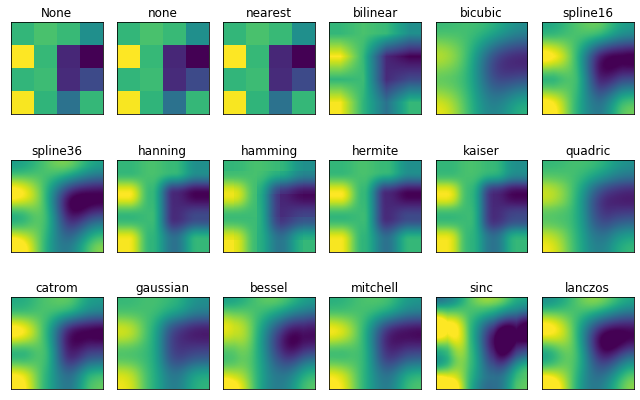

In [5]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()